# The Dataset
To build our emotion detector we'll use a great dataset from an article that explored how emotions are represented in English Twitter messages.footnote:[E. Saravia et al., "CARER: Contextualized Affect Representations for Emotion Recognition," Proceedings of the 2018 Conference on Empirical Methods in Natural Language Processing (Oct–Nov 2018): 3687–3697, http://dx.doi.org/10.18653/v1/D18-1404.] Unlike most sentiment analysis datasets that involve just "positive" and "negative" polarities, this dataset contains six basic emotions: anger, disgust, fear, joy, sadness, and surprise. Given a tweet, our task will be to train a model that can classify it into one of these emotions.

## A First Look at Hugging Face Datasets
We will use the Hugging Face Datasets library to download the data from the Hugging Face Hub. The Hub hosts thousands of datasets that can be easily loaded with the `load_dataset()` function. Let's start by exploring what's available:

In [ ]:
from datasets import load_dataset
from huggingface_hub import list_datasets

# Get list of all datasets from Hugging Face Hub
all_datasets = [dataset.id for dataset in list_datasets()]
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")

# Load the emotion dataset
emotions = load_dataset("emotion")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
HTTP Error 429 thrown while requesting GET https://huggingface.co/api/datasets?sort=trendingScore&cursor=eyIkb3IiOlt7InRyZW5kaW5nU2NvcmUiOjAsIl9pZCI6eyIkZ3QiOiI2OGQ0YTU4YWRhYWUwYTc2MDAxYzg4ODUifX0seyJ0cmVuZGluZ1Njb3JlIjp7IiRsdCI6MH19LHsidHJlbmRpbmdTY29yZSI6bnVsbH1dfQ%3D%3D
Retrying in 1s [Retry 1/20].
HTTP Error 429 thrown while requesting GET https://huggingface.co/api/datasets?sort=trendingScore&cursor=eyIkb3IiOlt7InRyZW5kaW5nU2NvcmUiOjAsIl9pZCI6eyIkZ3QiOiI2OGQ0YTU4YWRhYWUwYT

There are 670665 datasets currently available on the Hub
The first 10 are: ['facebook/research-plan-gen', 'bigai/TongSIM-Asset', 'bshada/open-schematics', 'nebius/SWE-rebench-openhands-trajectories', 'gaia-benchmark/GAIA', 'wikimedia/wikipedia', 'HiDream-ai/ReCo-Data', 'lirang04/GroundingME', 'cais/hle', 'nvidia/Nemotron-CC-v2.1']


README.md: 0.00B [00:00, ?B/s]

split/train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

split/validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

split/test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

We can see the dataset structure and the first few examples. Now let's look at the full dataset object:

In [ ]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

we see it is similar to a Python dictionary, with each key corresponding to a different split. And we can use the usual dictionary syntax to access an individual split:

In [ ]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

which returns an instance of the Dataset class. The Dataset object is one of the core data structures in Datasets, and we'll be exploring many of its features throughout the course of this book. For starters, it behaves like an ordinary Python array or list, so we can query its length:

In [ ]:
len(train_ds)

16000

or access a single example by its index:

In [ ]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

Here we see that a single row is represented as a dictionary, where the keys correspond to the column names:

In [ ]:
train_ds.column_names

['text', 'label']

and the values are the tweet and the emotion. This reflects the fact that Datasets is based on Apache Arrow, which defines a typed columnar format that is more memory efficient than native Python. We can see what data types are being used under the hood by accessing the features attribute of a Dataset object:

In [ ]:
print(train_ds.features)

{'text': Value('string'), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])}


In this case, the data type of the text column is string, while the label column is a special ClassLabel object that contains information about the class names and their mapping to integers. We can also access several rows with a slice:

In [ ]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


Note that in this case, the dictionary values are now lists instead of individual elements. We can also get the full column by name:

In [ ]:
print(train_ds["text"][:5])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


## 🎯 Exercise 1: Dataset Exploration
Now that you've seen how to load and explore the emotion dataset, try the following:

Question 1: Browse the Hugging Face Datasets Hub and find another text classification dataset (e.g., imdb, ag_news, or yelp_review_full). Load this dataset and explore its structure. How many classes does it have? How is it different from the emotion dataset?

Question 2: The current dataset is imbalanced. Using the Pandas documentation, research and implement at least one strategy to handle class imbalance (e.g., using resample() or sample() with weights). What effect do you expect this to have on model performance?

💡 Hint: Check the Hugging Face Datasets documentation for loading different datasets and the imbalanced-learn documentation for sampling strategies.

Now that we've seen how to load and inspect data with Datasets, let's do a few sanity checks about the content of our tweets.

Sidebar: What If My Dataset Is Not on the Hub?
We'll be using the Hugging Face Hub to download datasets for most of the examples in this book. But in many cases, you'll find yourself working with data that is either stored on your laptop or on a remote server in your organization. Datasets provides several loading scripts to handle local and remote datasets. Examples for the most common data formats are shown in <>.

asciidoc
[[dataset-loading]]
.How to load datasets in various formats
[options="header"]
|======
| Data format | Loading script | Example
| CSV | `csv` | `load_dataset("csv", data_files="my_file.csv")`
| Text | `text` | `load_dataset("text", data_files="my_file.txt")`
| JSON | `json` | `load_dataset("json", data_files="my_file.jsonl")`
|======

As you can see for each data format, we just need to pass the relevant loading script to the load_dataset() function, along with a data_files argument that specifies the path or URL to one or more files. For example, the source files for the emotion dataset are actually hosted on Dropbox, so an alternative way to load the dataset is to first download one of the splits:

In [ ]:
# Download the file using Python's urllib instead of wget
import urllib.request

dataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"
urllib.request.urlretrieve(dataset_url, "train.txt")
print("train.txt downloaded successfully!")

train.txt downloaded successfully!


If you’re wondering why there’s a ! character in the preceding shell command, that’s because we’re running the commands in a Jupyter notebook. Simply remove the prefix if you want to download and unzip the dataset within a terminal. Now, if we peek at the first row of the train.txt file:

In [ ]:
!head -n 1 train.txt

i didnt feel humiliated;sadness


we can see that here are no column headers and each tweet and emotion are separated by a semicolon. Nevertheless, this is quite similar to a CSV file, so we can load the dataset locally by using the csv script and pointing the data_files argument to the train.txt file:

In [ ]:
#hide_output
emotions_local = load_dataset("csv", data_files="train.txt", sep=";", names=["text", "label"])

Generating train split: 0 examples [00:00, ? examples/s]

Here we've also specified the type of delimiter and the names of the columns. An even simpler approach is to just point the data_files argument to the URL itself:

In [ ]:
#hide_output
dataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"
emotions_remote = load_dataset("csv", data_files=dataset_url, sep=";",
                               names=["text", "label"])

Generating train split: 0 examples [00:00, ? examples/s]

which will automatically download and cache the dataset for you. As you can see, the load_dataset() function is very versatile. We recommend checking out the Datasets documentation to get a complete overview.

## End sidebar
### From Datasets to DataFrames
Although Datasets provides a lot of low-level functionality to slice and dice our data, it is often convenient to convert a Dataset object to a Pandas DataFrame so we can access high-level APIs for data visualization. To enable the conversion, Datasets provides a set_format() method that allows us to change the output format of the Dataset. Note that this does not change the underlying data format (which is an Arrow table), and you can switch to another format later if needed:

In [ ]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


As you can see, the column headers have been preserved and the first few rows match our previous views of the data. However, the labels are represented as integers, so let's use the int2str() method of the label feature to create a new column in our DataFrame with the corresponding label names:

In [ ]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


Before diving into building a classifier, let's take a closer look at the dataset. As Andrej Karpathy notes in his famous blog post "A Recipe for Training Neural Networks", becoming "one with the data" is an essential step for training great models!

### Looking at the Class Distribution

Whenever you are working on text classification problems, it is a good idea to examine the distribution of examples across the classes. A dataset with a skewed class distribution might require a different treatment in terms of the training loss and evaluation metrics than a balanced one.

With Pandas and Matplotlib, we can quickly visualize the class distribution as follows:

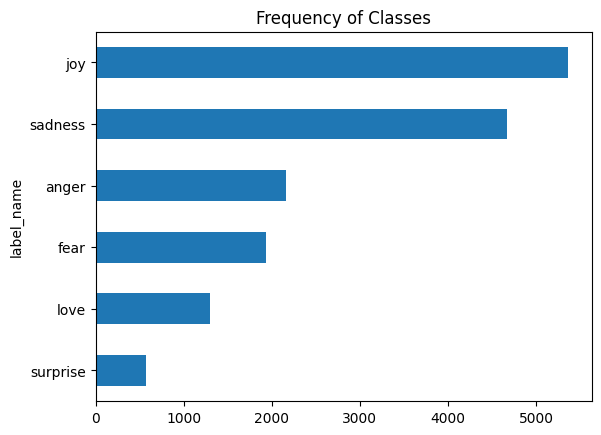

In [ ]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

### How Long Are Our Tweets?

Transformer models have a maximum input sequence length that is referred to as the maximum context size. For applications using DistilBERT, the maximum context size is 512 tokens, which amounts to a few paragraphs of text. We can get a rough estimate of tweet lengths per emotion by looking at the distribution of words per tweet:

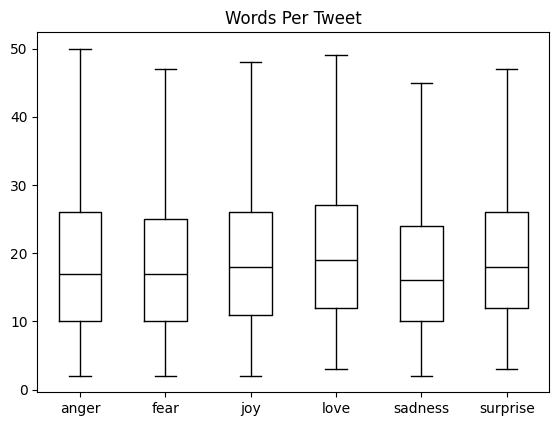

In [ ]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

Most tweets are less than 20 words long, well below DistilBERT's maximum context size of 512 tokens. What's more interesting is that "love", "happiness", and "sadness" tweets can all be longer than the other three classes. Since these tend to be more positive emotions, this could be evidence that more positive tweets are more verbose, possibly containing more words to express positive sentiment.

## From Text to Tokens

As we've seen, transformer models such as BERT cannot accept raw strings as input. Instead, they assume the text has been tokenized and encoded as numerical vectors. Tokenization is a fundamental step in Natural Language Processing (NLP) that breaks down text into smaller units called *tokens*. These tokens can be words, subwords, or even characters, depending on the tokenization method used. Understanding different tokenization approaches is crucial for effective NLP modeling, as they impact how models interpret and process text data.

In this section, we'll look at a few simple tokenizers and their problems to motivate learning about more sophisticated ones, like those used in BERT and GPT.

### Character Tokenization

The simplest tokenization scheme is to simply feed each character individually to the model. In Python, this is easy to do since strings are basically arrays of characters, so we can easily see the result:

In [ ]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [ ]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [ ]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [ ]:
categorical_df = pd.DataFrame(
    {"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0,1,2]})
categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [ ]:
pd.get_dummies(categorical_df["Name"])

,Bumblebee,Megatron,Optimus Prime
0,True,False,False
1,False,False,True
2,False,True,False


In [ ]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [ ]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")

Token: T
Tensor index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


Each token is a single character, including spaces and punctuation. The main advantage of this method is that the vocabulary is very small — in English, there are less than 256 unique characters when you include lowercase and uppercase letters, numbers, special characters, and punctuation. This makes character tokenization simple.

However, there's a big disadvantage: *individual characters do not carry much meaning on their own*. Even a short sentence might be split into a large number of tokens, and transformer models have a limit on the sequence length they can process. So while you might be able to encode the entire corpus with a small vocabulary, you end up with very long sequences that are not very informative.

### Word Tokenization

The next step up is to tokenize on the *word* level. There are several ways to do this, but a simple method is to use Python's `split()` function to split the text on whitespace:

In [ ]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


Notice that punctuation is now attached to the words and not split out into its own tokens. Word tokenization can get more sophisticated than whitespace splitting, with special rules for punctuation and is usually the most intuitive form of tokenization for those familiar with "word processors." Words carry much more meaning than individual characters, so sequences are more informative and generally shorter.

However, word tokenization introduces two new problems:
- **Large vocabularies**: There are a lot of words in a language — the Oxford English Dictionary contains around 170,000 words in current use, with many more if you include colloquialisms, proper nouns, or domain-specific terms. Each unique word becomes a token, leading to very large vocabularies. Huge vocabularies make training harder and slower.
- **Unknown words**: Word-based tokenizers can't handle words that weren't seen during training. If you have a word that didn't appear in the training corpus, it becomes an `[UNK]` (unknown) token. This is problematic, especially for misspellings or rare words like "supercalifragilisticexpialidocious."

### Subword Tokenization

The best of both worlds is *subword tokenization*, which splits text into subword units. The idea is to combine the benefits of character and word tokenization:
- Frequently used words are kept as unique tokens (like in word tokenization).
- Rare words are decomposed into meaningful subword units (like suffixes, prefixes, or common roots).

For example, "tokenization" might be split into "token" and "##ization", where the "##" indicates a subword continuation. This way, even if "tokenization" wasn't in the training vocabulary, the model can still understand it through its subword components.

The tokenizer used by DistilBERT is called **WordPiece**. It's learned from the training corpus and strikes a balance between vocabulary size and the ability to handle rare or unseen words. Let's see how it works using the Hugging Face `transformers` library:

In [ ]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

The `AutoTokenizer` class will automatically load the correct tokenizer for the model checkpoint. Let's test it out on our example text:

In [ ]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


The tokenizer returns a dictionary containing two keys:
- **input_ids**: A list of integers corresponding to each token in the text. These are the numerical representations that the model will process.
- **attention_mask**: A list of 1s and 0s that tells the model which tokens to pay attention to. This is especially useful when batching sequences of different lengths together — padding tokens get a mask value of 0.

We can decode the token IDs to see what the tokens actually look like:

In [ ]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


You'll see special tokens like `[CLS]` (classification token, added at the start) and `[SEP]` (separator token, added at the end). These are special tokens that BERT-based models expect. The actual words of our text are tokenized, and you can see that most common words are kept whole while special characters get their own tokens.

We can also convert the token IDs back to the original string:

In [ ]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [ ]:
tokenizer.vocab_size

30522

In [ ]:
tokenizer.model_max_length

512

In [ ]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

Perfect! The tokenizer can convert back and forth between text and token IDs seamlessly.

### Tokenizing the Whole Dataset

Now that we understand how tokenization works, let's tokenize the entire dataset. The Hugging Face `datasets` library makes this easy with the `map()` function, which applies a function to every example in the dataset:

In [ ]:
emotions.reset_format()

In [ ]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [ ]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [ ]:
#hide_input
tokens2ids = list(zip(tokenizer.all_special_tokens, tokenizer.all_special_ids))
data = sorted(tokens2ids, key=lambda x : x[-1])
df = pd.DataFrame(data, columns=["Special Token", "Special Token ID"])
df.T

,0,1,2,3,4
Special Token,[PAD],[UNK],[CLS],[SEP],[MASK]
Special Token ID,0,100,101,102,103


In [ ]:
# Reset format from pandas back to default before tokenizing
emotions.reset_format()

def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Let's break down what's happening:
- `padding=True`: Pads shorter sequences with zeros so all sequences in a batch have the same length.
- `truncation=True`: Truncates sequences that are longer than the model's maximum input length.
- `batched=True`: Processes the dataset in batches for efficiency.
- `batch_size=None`: Processes the entire dataset in a single batch.

Let's take a look at the tokenized dataset:

In [ ]:
print(emotions_encoded)

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})


You can see the dataset now has two new columns: `input_ids` and `attention_mask`. These are exactly what we need to feed into our transformer model!

## 🎯 Exercise 2: Tokenization Experiments

Understanding how tokenization affects model performance is crucial. Try the following experiments:

**Question 1:** Load a different pre-trained model tokenizer (e.g., `bert-base-cased`, `roberta-base`, or `albert-base-v2`) and compare its tokenization output with DistilBERT. Use the Hugging Face Models Hub to find available models. What differences do you notice? How does cased vs uncased tokenization affect the output?

**Question 2:** Experiment with the tokenizer's padding and truncation parameters. What happens if you set `max_length=10` with `truncation=True`? Read the tokenizer documentation to understand different padding strategies (`max_length`, `longest`, `do_not_pad`).

## GPU Setup and Model Loading

Here we've used PyTorch to check whether a GPU is available or not, and then chained the PyTorch `nn.Module.to()` method to the model loader. This ensures that the model will run on the GPU if we have one. If not, the model will run on the CPU, which can be considerably slower.

The `AutoModel` class converts the token encodings to embeddings, and then feeds them through the encoder stack to return the hidden states. Let's take a look at how we can extract these states from our corpus.

### Sidebar: Interoperability Between Frameworks

Although the code in this book is mostly written in PyTorch, Transformers provides tight interoperability with TensorFlow and JAX. This means that you only need to change a few lines of code to load a pretrained model in your favorite deep learning framework!

For example, we can load DistilBERT in TensorFlow by using the `TFAutoModel` class as follows:

In [ ]:
from transformers import AutoModel
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

## Extracting the Last Hidden States

To warm up, let's retrieve the last hidden states for a single string. The first thing we need to do is encode the string and convert the tokens to PyTorch tensors. This can be done by providing the `return_tensors="pt"` argument to the tokenizer as follows:

In [ ]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


As we can see, the resulting tensor has the shape `[batch_size, n_tokens]`. Now that we have the encodings as a tensor, the final step is to place them on the same device as the model and pass the inputs as follows:

In [ ]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]]), hidden_states=None, attentions=None)


Here we've used the `torch.no_grad()` context manager to disable the automatic calculation of the gradient. This is useful for inference since it reduces the memory footprint of the computations.

Depending on the model configuration, the output can contain several objects, such as the hidden states, losses, or attentions, arranged in a class similar to a namedtuple in Python. In our example, the model output is an instance of `BaseModelOutput`, and we can simply access its attributes by name. The current model returns only one attribute, which is the last hidden state, so let's examine its shape:

In [ ]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

Looking at the hidden state tensor, we see that it has the shape `[batch_size, n_tokens, hidden_dim]`. In other words, a 768-dimensional vector is returned for each of the 6 input tokens.

For classification tasks, it is common practice to just use the hidden state associated with the `[CLS]` token as the input feature. Since this token appears at the start of each sequence, we can extract it by simply indexing into `outputs.last_hidden_state` as follows:

In [ ]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

Now that we know how to get the last hidden state for a single string, let's do the same thing for the whole dataset by creating a new `hidden_state` column that stores all these vectors. As we did with the tokenizer, we'll use the `map()` method of `DatasetDict` to extract all the hidden states in one go.

The first thing we need to do is wrap the previous steps in a processing function:

In [53]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

The only difference between this function and our previous logic is the final step where we place the final hidden state back on the CPU as a NumPy array. The `map()` method requires the processing function to return Python or NumPy objects when we're using batched inputs.

Since our model expects tensors as inputs, the next thing to do is convert the `input_ids` and `attention_mask` columns to the "torch" format, as follows:

In [54]:
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])

We can then go ahead and extract the hidden states across all splits in one go:

In [ ]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Note that we did not set `batch_size=None` in this case, so the default `batch_size=1000` is used instead. As expected, applying the `extract_hidden_states()` function has added a new `hidden_state` column to our dataset:

In [55]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

Now that we have the hidden states associated with each tweet, the next step is to train a classifier on them. To do that, we'll need a feature matrix - let's take a look.

## Creating a Feature Matrix

The preprocessed dataset now contains all the information we need to train a classifier on it. We will use the hidden states as input features and the labels as targets. We can easily create the corresponding arrays in the well-known Scikit-Learn format as follows:

In [56]:
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

Before we train a model on the hidden states, it's good practice to perform a sanity check to ensure that they provide a useful representation of the emotions we want to classify. In the next section, we'll see how visualizing the features provides a fast way to achieve this.

## Visualizing the Training Set

Since visualizing the hidden states in 768 dimensions is tricky to say the least, we'll use the powerful UMAP algorithm to project the vectors down to 2D. Since UMAP works best when the features are scaled to lie in the [0,1] interval, we'll first apply a `MinMaxScaler` and then use the UMAP implementation from the `umap-learn` library to reduce the hidden states:

In [57]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.106087,3.414343,0
1,-3.239717,4.061440,0
2,5.032062,6.857755,3
3,-2.294802,6.087194,2
4,-3.427205,6.132077,3


The result is an array with the same number of training samples, but with only 2 features instead of the 768 we started with! Let's investigate the compressed data a little bit further and plot the density of points for each category separately:

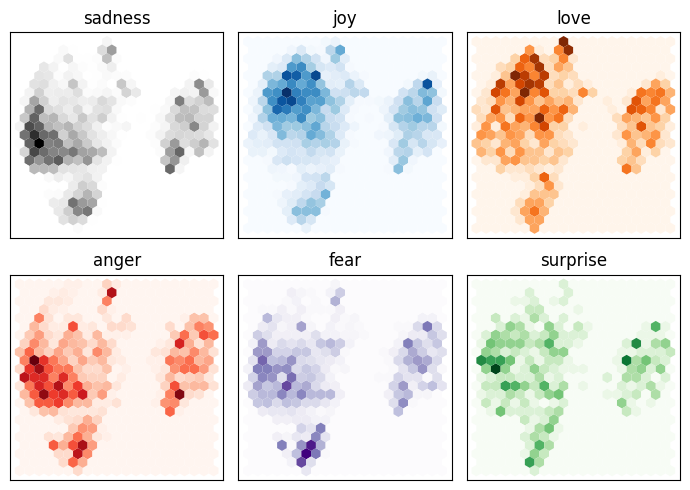

In [58]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

**Note:** These are only projections onto a lower-dimensional space. Just because some categories overlap does not mean that they are not separable in the original space. Conversely, if they are separable in the projected space they will be separable in the original space.

From this plot we can see some clear patterns: the negative feelings such as sadness, anger, and fear all occupy similar regions with slightly varying distributions. On the other hand, joy and love are well separated from the negative emotions and also share a similar space. Finally, surprise is scattered all over the place.

Although we may have hoped for some separation, this is in no way guaranteed since the model was not trained to know the difference between these emotions. It only learned them implicitly by guessing the masked words in texts.

Now that we've gained some insight into the features of our dataset, let's finally train a model on it!

## Training a Simple Classifier

We've seen that the hidden states are somewhat different between the emotions, although for several of them there is no obvious boundary. Let's use these hidden states to train a logistic regression model with Scikit-Learn. Training such a simple model is fast and does not require a GPU:

In [59]:
# We increase `max_iter` to guarantee convergence
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.6335

Looking at the accuracy, it might appear that our model is just a bit better than random—but since we are dealing with an unbalanced multiclass dataset, it's actually significantly better. We can examine whether our model is any good by comparing it against a simple baseline.

In Scikit-Learn there is a `DummyClassifier` that can be used to build a classifier with simple heuristics such as always choosing the majority class or always drawing a random class. In this case the best-performing heuristic is to always choose the most frequent class, which yields an accuracy of about 35%:

In [60]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

So, our simple classifier with DistilBERT embeddings is significantly better than our baseline. We can further investigate the performance of the model by looking at the confusion matrix of the classifier, which tells us the relationship between the true and predicted labels:

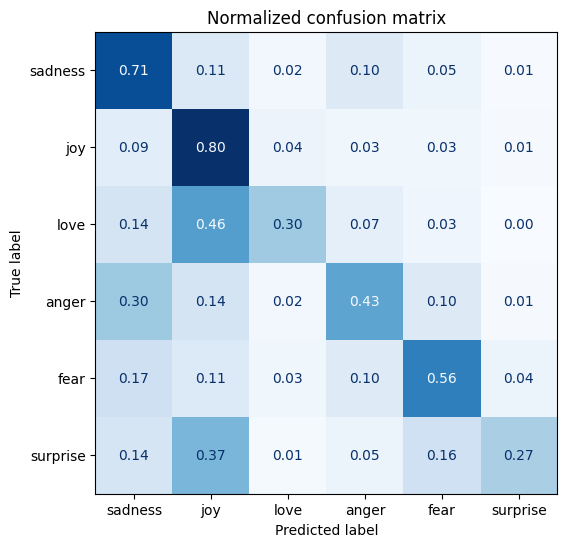

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

We can see that anger and fear are most often confused with sadness, which agrees with the observation we made when visualizing the embeddings. Also, love and surprise are frequently mistaken for joy.

In the next section we will explore the fine-tuning approach, which leads to superior classification performance. It is, however, important to note that doing this requires more computational resources, such as GPUs, that might not be available in your organization. In cases like these, a feature-based approach can be a good compromise between doing traditional machine learning and deep learning.

## Fine-Tuning Transformers

Let's now explore what it takes to fine-tune a transformer end-to-end. With the fine-tuning approach we do not use the hidden states as fixed features, but instead train them. This requires the classification head to be differentiable, which is why this method usually uses a neural network for classification.

Training the hidden states that serve as inputs to the classification model will help us avoid the problem of working with data that may not be well suited for the classification task. Instead, the initial hidden states adapt during training to decrease the model loss and thus increase its performance.

We'll be using the Trainer API from Transformers to simplify the training loop. Let's look at the ingredients we need to set one up!

### Loading a Pretrained Model

The first thing we need is a pretrained DistilBERT model like the one we used in the feature-based approach. The only slight modification is that we use the `AutoModelForSequenceClassification` model instead of `AutoModel`.

The difference is that the `AutoModelForSequenceClassification` model has a classification head on top of the pretrained model outputs, which can be easily trained with the base model. We just need to specify how many labels the model has to predict (six in our case), since this dictates the number of outputs the classification head has:

In [62]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


You will see a warning that some parts of the model are randomly initialized. This is normal since the classification head has not yet been trained. The next step is to define the metrics that we'll use to evaluate our model's performance during fine-tuning.

### Defining the Performance Metrics

To monitor metrics during training, we need to define a `compute_metrics()` function for the Trainer. This function receives an `EvalPrediction` object (which is a named tuple with `predictions` and `label_ids` attributes) and needs to return a dictionary that maps each metric's name to its value.

For our application, we'll compute the $F_1$-score and the accuracy of the model as follows:

In [63]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

With the dataset and metrics ready, we just have two final things to take care of before we define the Trainer class:

1. Log in to our account on the Hugging Face Hub. This will allow us to push our fine-tuned model to our account on the Hub and share it with the community.
2. Define all the hyperparameters for the training run.

We'll tackle these steps in the next section.

### Training the Model

If you're running this code in a Jupyter notebook, you can log in to the Hub with the following helper function:

In [64]:
from huggingface_hub import notebook_login

notebook_login()

## 🎯 Exercise 3: Feature Extraction and Model Selection

You've seen how to use transformers as feature extractors with a simple logistic regression classifier. Let's explore alternatives:

**Question 1:** Try using different classifiers from scikit-learn instead of logistic regression. Test at least two of the following: `RandomForestClassifier`, `SVC` (Support Vector Classifier), or `MLPClassifier` (Neural Network). Compare their performance with logistic regression. Which one works best and why?

**Question 2:** The UMAP visualization uses `n_components=2` and `metric="cosine"`. Read the UMAP documentation and experiment with different values for `n_components` (try 3), `metric` (try "euclidean"), and `n_neighbors` parameters. How does this affect the visualization and what insights can you gain?

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
print(f"Random Forest accuracy: {rf_clf.score(X_valid, y_valid):.3f}")

svc_clf = SVC(kernel='rbf')
svc_clf.fit(X_train, y_train)
print(f"SVC accuracy: {svc_clf.score(X_valid, y_valid):.3f}")

Random Forest accuracy: 0.516
SVC accuracy: 0.583


In [66]:
from umap import UMAP

mapper_3d = UMAP(n_components=3, metric="euclidean", n_neighbors=15).fit(X_scaled)

### Logging in to Hugging Face Hub

This will display a widget in which you can enter your username and password, or an access token with write privileges. You can find details on how to create access tokens in the Hub documentation. If you're working in the terminal, you can log in by running the following command:

```bash
$ huggingface-cli login
```

### Setting Up Training Arguments

To define the training parameters, we use the `TrainingArguments` class. This class stores a lot of information and gives you fine-grained control over the training and evaluation. The most important argument to specify is `output_dir`, which is where all the artifacts from training are stored. Here is an example of `TrainingArguments` in all its glory:

In [67]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"

training_args = TrainingArguments(
    output_dir=model_name,
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    eval_strategy="epoch",
    disable_tqdm=False,
    logging_steps=logging_steps,
    push_to_hub=False,
    log_level="error"
)

Here we also set the batch size, learning rate, and number of epochs, and specify to load the best model at the end of the training run. With this final ingredient, we can instantiate and fine-tune our model with the Trainer:

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=emotions_encoded["train"],
    eval_dataset=emotions_encoded["validation"],
    tokenizer=tokenizer
)

trainer.train()

/tmp/ipython-input-2192952355.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:

 3


wandb: You chose "Don't visualize my results"


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss


Looking at the logs, we can see that our model has an $F_1$-score on the validation set of around 92% - this is a significant improvement over the feature-based approach!

We can take a more detailed look at the training metrics by calculating the confusion matrix. To visualize the confusion matrix, we first need to get the predictions on the validation set. The `predict()` method of the `Trainer` class returns several useful objects we can use for evaluation:

In [ ]:
preds_output = trainer.predict(emotions_encoded["validation"])

The output of the `predict()` method is a `PredictionOutput` object that contains arrays of predictions and `label_ids`, along with the metrics we passed to the trainer. For example, the metrics on the validation set can be accessed as follows:

In [ ]:
preds_output.metrics

It also contains the raw predictions for each class. We can decode the predictions greedily using `np.argmax()`. This yields the predicted labels and has the same format as the labels returned by the Scikit-Learn models in the feature-based approach:

In [ ]:
y_preds = np.argmax(preds_output.predictions, axis=1)

With the predictions, we can plot the confusion matrix again:

In [ ]:
plot_confusion_matrix(y_preds, y_valid, labels)

This is much closer to the ideal diagonal confusion matrix. The `love` category is still often confused with `joy`, which seems natural. `surprise` is also frequently mistaken for `joy`, or confused with `fear`. Overall the performance of the model seems quite good, but before we call it a day, let's dive a little deeper into the types of errors our model is likely to make.

### Sidebar: Fine-Tuning with Keras

If you are using TensorFlow, it's also possible to fine-tune your models using the Keras API. The main difference from the PyTorch API is that there is no Trainer class, since Keras models already provide a built-in `fit()` method. To see how this works, let's first load DistilBERT as a TensorFlow model:

In [ ]:
from transformers import TFAutoModelForSequenceClassification

tf_model = (TFAutoModelForSequenceClassification
             .from_pretrained(model_ckpt, num_labels=num_labels))

Next, we'll convert our datasets into the `tf.data.Dataset` format. Since we have already padded our tokenized inputs, we can do this easily by applying the `to_tf_dataset()` method to `emotions_encoded`:

In [ ]:
tokenizer_columns = tokenizer.model_input_names

tf_train_dataset = emotions_encoded["train"].to_tf_dataset(
    columns=tokenizer_columns, label_cols=["label"], shuffle=True,
    batch_size=batch_size)
tf_eval_dataset = emotions_encoded["validation"].to_tf_dataset(
     columns=tokenizer_columns, label_cols=["label"], shuffle=False,
     batch_size=batch_size)

Here we've also shuffled the training set, and defined the batch size for it and the validation set. The last thing to do is compile and train the model:

In [ ]:
import tensorflow as tf

tf_model.compile(
     optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
     metrics=tf.metrics.SparseCategoricalAccuracy())

tf_model.fit(tf_train_dataset, validation_data=tf_eval_dataset, epochs=2)

## Error Analysis

Before moving on, we should investigate our model's predictions a little bit further. A simple yet powerful technique is to sort the validation samples by the model loss. When we pass the label during the forward pass, the loss is automatically calculated and returned. Here's a function that returns the loss along with the predicted label:

In [ ]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                             reduction="none")

    # Place outputs on CPU for compatibility with other dataset columns
    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()}

Using the `map()` method once more, we can apply this function to get the losses for all the samples:

In [ ]:
# Convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16)

Finally, we create a DataFrame with the texts, losses, and predicted/true labels:

In [ ]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))

We can now easily sort `emotions_encoded` by the losses in either ascending or descending order. The goal of this exercise is to detect one of the following:

**Wrong labels:** Every process that adds labels to data can be flawed. Annotators can make mistakes or disagree, while labels that are inferred from other features can be wrong. If it was easy to automatically annotate data, then we would not need a model to do it. Thus, it is normal that there are some wrongly labeled examples. With this approach, we can quickly find and correct them.

**Quirks of the dataset:** Datasets in the real world are always a bit messy. When working with text, special characters or strings in the inputs can have a big impact on the model's predictions. Inspecting the model's weakest predictions can help identify such features, and cleaning the data or injecting similar examples can make the model more robust.

Let's first have a look at the data samples with the highest losses:

In [ ]:
df_test.sort_values("loss", ascending=False).head(10)

By examining these high-loss examples, you can identify patterns in what confuses the model most. This helps guide data cleaning, additional training examples, or model improvements.

## 🎯 Exercise 4: Fine-Tuning Hyperparameters

Fine-tuning performance depends heavily on hyperparameter choices. Let's experiment with the training configuration:

**Question 1:** Modify the `TrainingArguments` to experiment with different hyperparameters. Try changing at least 2 of the following and observe the impact on model performance:

- `learning_rate`: Try values like 5e-5, 3e-5, or 1e-5
- `num_train_epochs`: Try 3 or 5 epochs
- `per_device_train_batch_size`: Try 32 or 128
- `weight_decay`: Try 0.001 or 0.1
- Add `warmup_steps=500` for learning rate warm-up

Consult the `TrainingArguments` documentation for all available options. Which combination gives the best F1-score?

**Question 2:** Try fine-tuning a different pre-trained model (e.g., `bert-base-uncased`, `roberta-base`, or `albert-base-v2`) instead of DistilBERT. How does the training time and final performance compare? What trade-offs do you observe between model size and accuracy?

In [ ]:
training_args_exp = TrainingArguments(
     output_dir="experiment-model",
     num_train_epochs=3,
     learning_rate=5e-5,
     per_device_train_batch_size=32,
     weight_decay=0.001,
     warmup_steps=500,
     eval_strategy="epoch",
     logging_steps=logging_steps,
 )

trainer_exp = Trainer(
    model=model,
    args=training_args_exp,
    compute_metrics=compute_metrics,
    train_dataset=emotions_encoded["train"],
    eval_dataset=emotions_encoded["validation"],
    tokenizer=tokenizer
)
trainer_exp.train()

In [ ]:

from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Try a different model
new_model_ckpt = "bert-base-uncased"
new_tokenizer = AutoTokenizer.from_pretrained(new_model_ckpt)
new_model = AutoModelForSequenceClassification.from_pretrained(new_model_ckpt, num_labels=num_labels).to(device)
def tokenize_new(batch):
    return new_tokenizer(batch["text"], padding=True, truncation=True)
# Retokenize the dataset with new tokenizer
emotions_encoded_new = emotions.map(tokenize_new, batched=True)

### Analyzing Prediction Quality

We can clearly see that the model predicted some of the labels incorrectly. On the other hand, it seems that there are quite a few examples with no clear class, which might be either mislabeled or require a new class altogether. In particular, `joy` seems to be mislabeled several times. With this information we can refine the dataset, which often can lead to as big a performance gain (or more) as having more data or larger models!

When looking at the samples with the lowest losses, we observe that the model seems to be most confident when predicting the `sadness` class. Deep learning models are exceptionally good at finding and exploiting shortcuts to get to a prediction. For this reason, it is also worth investing time into looking at the examples that the model is most confident about, so that we can be confident that the model does not improperly exploit certain features of the text.

So, let's also look at the predictions with the smallest loss:

In [ ]:
df_test.sort_values("loss", ascending=True).head(10)

We now know that `joy` is sometimes mislabeled and that the model is most confident about predicting the label `sadness`. With this information we can make targeted improvements to our dataset, and also keep an eye on the class the model seems to be very confident about.

The last step before serving the trained model is to save it for later usage. Transformers allows us to do this in a few steps, which we'll show you in the next section.

## 🎯 Exercise 5: Model Deployment and Inference

Now that you have a trained model, let's explore deployment options:

**Question 1:** Read about the Hugging Face Inference API and test your deployed model via HTTP requests. Write a Python function using the `requests` library to send text to your model and receive predictions. How would you integrate this into a web application?

In [ ]:

import requests

API_URL = "https://api-inference.huggingface.co/models/YOUR_USERNAME/YOUR_MODEL"
headers = {"Authorization": f"Bearer {YOUR_TOKEN}"}

def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()

# Test the API
output = query({
    "inputs": "I am feeling great today!",
})
print(output)

**Question 2:** The pipeline returns probabilities for all classes with `return_all_scores=True`. Explore the pipeline documentation and try different parameters like `top_k`, `truncation`, and `max_length`. How do these parameters affect the inference results? Try creating a pipeline for a different task (e.g., `sentiment-analysis` or `zero-shot-classification`).

In [ ]:
from transformers import pipeline
# Create a pipeline with all scores
classifier = pipeline("text-classification", model=model_name, tokenizer=model_name,
                      device=0 if torch.cuda.is_available() else -1, return_all_scores=True)

custom_tweet = "I am so happy and excited about this!"
preds = classifier(custom_tweet)

# Try different parameters
classifier_truncated = pipeline("text-classification", model=model_name,
                                 tokenizer=model_name, max_length=50, truncation=True)
classifier_top_k = pipeline("text-classification", model=model_name,
                                                        tokenizer=model_name, top_k=3)

### Visualizing Prediction Probabilities

Let's visualize the prediction probabilities across all emotion classes for a custom tweet:

In [ ]:
# Visualize prediction probabilities
import pandas as pd
import matplotlib.pyplot as plt

# Get predictions with all scores
custom_tweet = "I am so happy and excited about this!"
preds = classifier(custom_tweet)

# Create a bar plot
preds_df = pd.DataFrame(preds[0])
plt.figure(figsize=(10, 6))
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.xlabel("Emotion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This visualization shows how confident the model is for each emotion class. You can see that the model assigns the highest probability to the most likely emotion, but also provides uncertainty information through the probability distribution across all classes.

## Conclusion

Congratulations! In this comprehensive tutorial, you've learned:

1. **Dataset Loading and Exploration** - How to load datasets from the Hugging Face Hub and explore their structure
2. **Tokenization** - Understanding different tokenization strategies and their impact on model performance
3. **Feature Extraction** - Using pre-trained transformers as feature extractors with traditional ML classifiers
4. **Fine-Tuning** - End-to-end fine-tuning of transformer models for text classification
5. **Error Analysis** - Identifying model weaknesses and dataset issues through systematic analysis
6. **Model Deployment** - Saving and deploying models for real-world applications

These skills form the foundation for building production-ready NLP applications using modern transformer architectures!